In [101]:
import torch, torchvision
from torchvision.transforms import ToTensor, Resize
from torchvision import transforms
import os
from PIL import Image
from torch.utils.data import DataLoader
from dataset import CatDogDataset
import torch.nn as nn
import matplotlib.pyplot as plt
from torch import optim
from tqdm import tqdm
import copy
import pdb

In [102]:
TRAIN_PATH = "/home/alireza/Deep/project-1/data/train"
VAL_PATH = "/home/alireza/Deep/project-1/data/val"
NUM_BATCH = 32
EPOCHS = 20
LEARNING_RATE = 1e-3
DEVICE = "cpu"


In [103]:
transform = transforms.Compose([
    ToTensor(),
    Resize((50,50))
])

In [104]:
train_data = CatDogDataset(TRAIN_PATH, transform)
val_data = CatDogDataset(VAL_PATH, transform)

In [105]:
train_dl = DataLoader(train_data, batch_size=NUM_BATCH)
val_dl = DataLoader(val_data, batch_size=NUM_BATCH)

In [106]:
print(val_data[10][1])

cat


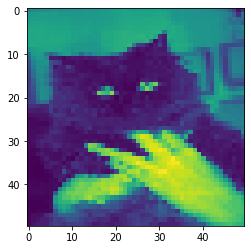

In [99]:
plt.imshow(val_data[10][0][0])

In [84]:
model = torchvision.models.resnet18(pretrained=True)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [85]:
for param in model.parameters():
    param.requires_grad = False

In [86]:
model.fc = nn.Linear(in_features=512, out_features=2)

In [87]:
def validate(model, data):
    total = 0
    correct = 0

    for (images, labels) in data:
        images = images.to(DEVICE)
        x = model(images)
        _, pred = torch.max(x, 1)
        print(labels)
        total += x.size(0)
        for i in range(len(pred)):
            if (pred[i] == labels[i]):
                correct += 1
            
        
    return correct*100/total

In [88]:
validate(model, val_dl)

('cat', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'dog', 'dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat')
('cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog')
('cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat')
('cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog')
('cat', 'dog', 'cat', 'dog', 'dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat', '

KeyboardInterrupt: 

In [59]:
def train(num_epoch = EPOCHS, lr = LEARNING_RATE, device = DEVICE):
    accuracies = []
    cnn = model().to(device)
    cec = nn.CrossEntropyLoss()
    optimizer = optim.Adam(cnn.parameters(), lr=lr)

    max_accuracy = 0

    for epoch in range(num_epoch):
        for i, (images, labels) in tqdm(enumerate(train_dl)):
            images = images.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            pred = cnn(images)
            loss = cec(pred, labels)
            loss.backward()
            optimizer.step()
        accuracy = float(validate(cnn,val_dl))
        accuracies.append(accuracy)
        if accuracy > max_accuracy:
            best_model = copy.deepcopy(cnn)
            max_accuracy = accuracy
            print("saving best model with accuracy: ", accuracy)
        print("Epoch: ", epoch+1, "Accuracy: ", accuracy, "%")

    plt.plot(accuracies)
    return best_model

10 32
21 64
37 96
58 128
71 160
89 192
103 224
118 256
132 288
148 320
162 352
179 384
195 416
210 448
226 480
239 512
257 544
272 576
294 608
305 640
318 672
334 704
352 736
366 768
385 800
404 832
418 864
434 896
446 928
462 960
475 992
492 1024
509 1056
522 1088
537 1120
553 1152
566 1184
581 1216
591 1248
607 1280
622 1312
636 1344
646 1376
663 1408
682 1440
695 1472
707 1504
725 1536
740 1568
758 1600
777 1632
792 1664
808 1696
820 1728
834 1760
850 1792
867 1824
884 1856
900 1888
918 1920
934 1952
946 1984
960 2016
973 2048
986 2080
1002 2112
1016 2144
1030 2176
1044 2208
1060 2240
1076 2272
1092 2304
1109 2336
1126 2368
1141 2400
1157 2432
1170 2464
1189 2496
1204 2528
1221 2560
1231 2592
1247 2624
1261 2656
1276 2688
1294 2720
1307 2752
1322 2784
1339 2816
1359 2848
1373 2880
1387 2912
1401 2944
1417 2976
1435 3008
1447 3040
1461 3072
1473 3104
1485 3136
1501 3168
1516 3200
1529 3232
1546 3264
1562 3296
1580 3328
1596 3360
1612 3392
1628 3424
1643 3456
1657 3488
1673 3520
1691 